In [31]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [32]:
dataDir='../data'
dataType='val'
annFile='{}/{}/annotations.json'.format(dataDir,dataType)
imgPath='{}/{}/images/'.format(dataDir,dataType)

In [33]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.14s)
creating index...
index created!


In [34]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
water pear egg grapes butter bread-white jam bread-whole-wheat apple tea-green white-coffee-with-caffeine tea-black mixed-salad-chopped-without-sauce cheese tomato-sauce pasta-spaghetti carrot onion beef-cut-into-stripes-only-meat rice-noodles-vermicelli salad-leaf-salad-green bread-grain espresso-with-caffeine banana mixed-vegetables bread-wholemeal savoury-puff-pastry wine-white dried-meat fresh-cheese red-radish hard-cheese ham-raw bread-fruit oil-vinegar-salad-dressing tomato cauliflower potato-gnocchi wine-red sauce-cream pasta-linguini-parpadelle-tagliatelle french-beans almonds dark-chocolate mandarine semi-hard-cheese croissant sushi berries biscuits thickened-cream-35 corn celeriac alfa-sprouts chickpeas leaf-spinach rice chocolate-cookies pineapple tart coffee-with-caffeine focaccia pizza-with-vegetables-baked soup-vegetable bread-toast potatoes-steamed spaetzle frying-sausage lasagne-meat-prepared boisson-au-glucose-50g ma1-4esli peanut-butter chips-french-

In [35]:
#Funzione che data l'immagine e l'annotazione dava l'immagine già segnata
#Funzione che calcola l'IoU


def annotation(coco,imgPath,img_ids,cat,is_crowd):
    #cat = list of categories
    #img = list of img (in our case the Ids)
    # get all images containing given categories, from example file o
    catIds = coco.getCatIds(catNms=cat)
    
    for image_id in img_ids:
        id = coco.getImgIds(imgIds= [image_id])
        img = coco.loadImgs(id)[0]
        imgFile = imgPath + img['file_name']
        I = io.imread(imgFile)
        plt.imshow(I)
        plt.axis('off')
        plt.show()
        plt.imshow(I)
        plt.axis('off')
        annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=is_crowd)
        anns = coco.loadAnns(annIds)
        coco.showAnns(anns)
        plt.show()
        return anns

In [50]:
# initialize COCO api for person keypoints annotations
categories = ['banana','egg','croissant']
image_numbers = [9513
                 #,10090
                ]

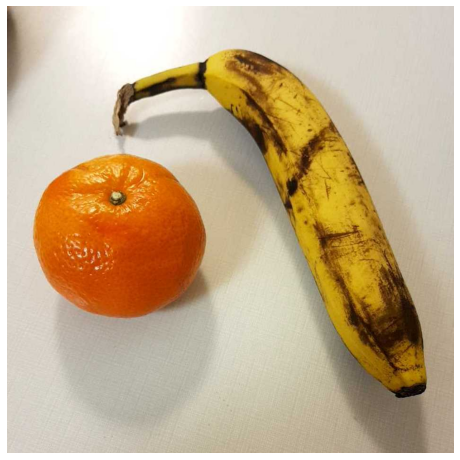

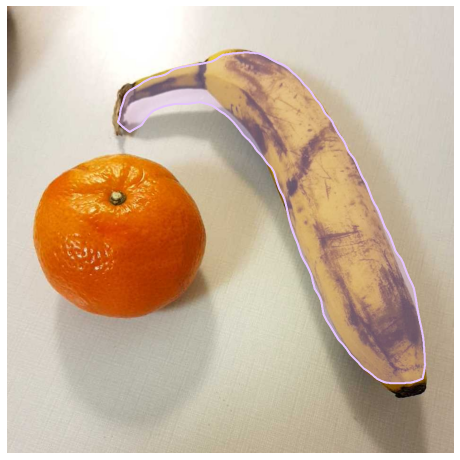

In [51]:
anns = annotation(coco,imgPath,image_numbers,categories,None)

In [55]:
dataDirEx='../data'
dataTypeEx='example'
annFileEx='{}/{}/annotations.json'.format(dataDirEx,dataTypeEx)
imgPathEx='{}/{}/images/'.format(dataDirEx,dataTypeEx)

# initialize COCO api for instance annotations
coco_ex=COCO(annFileEx)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


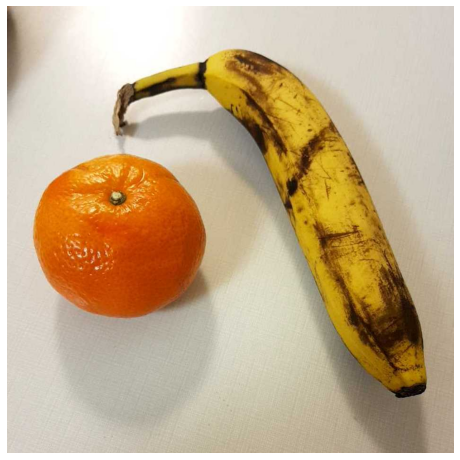

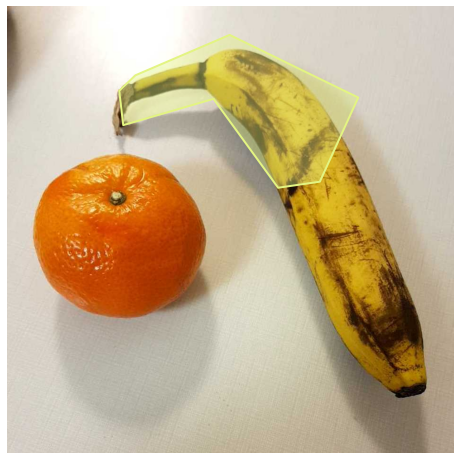

[{'id': 5913, 'image_id': 9513, 'category_id': 1154, 'segmentation': [[236.105580693816, 177.79034690799398, 270.24132730015083, 145.0769230769231, 469.3665158371041, 59.737556561085974, 741.0301659125189, 192.01357466063348, 659.9577677224736, 369.80392156862746, 571.7737556561086, 382.60482654600304, 435.2307692307692, 194.85822021116138, 244.6395173453997, 250.32880844645553]], 'bbox': [236.105580693816, 59.737556561085974, 504.9245852187029, 322.8672699849171], 'area': 79526.23465030521, 'iscrowd': 0}]


In [56]:
anns = annotation(coco_ex,imgPath,image_numbers,categories,None)
print(anns)
file = open('res.json', 'w')
file.write(str(anns).replace("'",'"'))
file.close()

In [57]:
from pycocotools.cocoeval import COCOeval

annType = 'segm'
print('Running demo for *%s* results.'%(annType))

Running demo for *segm* results.


In [58]:
#initialize COCO ground truth api
dataDir='../data'
dataType='val'
annFile='{}/{}/annotations.json'.format(dataDir,dataType)
imgPath='{}/{}/images/'.format(dataDir,dataType)
cocoGt=COCO(annFile)

loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


In [59]:
#initialize COCO detections api
resFile='res.json'
cocoDt=cocoGt.loadRes(resFile)

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!


In [60]:
# running evaluation
cocoEval = COCOeval(cocoGt,cocoDt,annType)
cocoEval.params.imgIds  = image_numbers
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()

Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=